In [11]:
import matplotlib.pyplot as plt                  
import pandas as pd
import numpy as np

In [12]:
file_path = 'data/'   
plot_path = 'plots/'

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=3000, nlev_t=1${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=4000, nlev_t=1${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=3000, nlev_t=5${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=4000, nlev_t=5${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=3000, nlev_t=10${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'auto, lmin=100 lmax=4000, nlev_t=10${\\mu}k$')

Text(0.5, 0, '$L$')

Text(0, 0.5, '$({\\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')

(0, 3000)

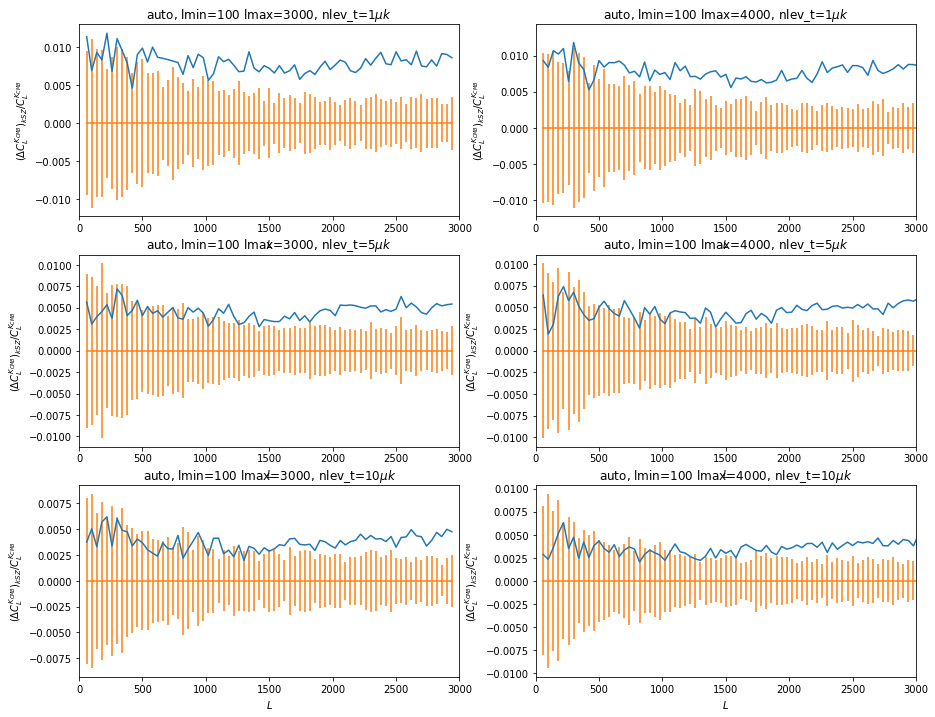

In [13]:
fig_auto, ax_auto = plt.subplots(3,2,figsize=(15,12))
plot_name ='auto_all.png'
auto_00 = pd.read_csv(file_path + 'auto_lmin=100_lmax=3000_nlev_t=1.csv')
auto_01 = pd.read_csv(file_path + 'auto_lmin=100_lmax=4000_nlev_t=1.csv')
auto_10 = pd.read_csv(file_path + 'auto_lmin=100_lmax=3000_nlev_t=5.csv')
auto_11 = pd.read_csv(file_path + 'auto_lmin=100_lmax=4000_nlev_t=5.csv')
auto_20 = pd.read_csv(file_path + 'auto_lmin=100_lmax=3000_nlev_t=10.csv')
auto_21 = pd.read_csv(file_path + 'auto_lmin=100_lmax=4000_nlev_t=10.csv')

ax_auto[0,0].plot(auto_00['L'], auto_00['auto_bias'])
ax_auto[0,0].errorbar(auto_00['L'], np.zeros(np.shape(auto_00['L'])), yerr=auto_00['auto_bias_err'])
ax_auto[0,0].set_title(r'auto, lmin=100 lmax=3000, nlev_t=1${\mu}k$')
ax_auto[0,0].set_xlabel('$L$')                                                                        
ax_auto[0,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[0,0].set_xlim([0,3000])

ax_auto[0,1].plot(auto_01['L'], auto_01['auto_bias'])
ax_auto[0,1].errorbar(auto_01['L'], np.zeros(np.shape(auto_01['L'])), yerr=auto_01['auto_bias_err'])
ax_auto[0,1].set_title(r'auto, lmin=100 lmax=4000, nlev_t=1${\mu}k$')
ax_auto[0,1].set_xlabel('$L$')                                                                        
ax_auto[0,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[0,1].set_xlim([0,3000])

ax_auto[1,0].plot(auto_10['L'], auto_10['auto_bias'])
ax_auto[1,0].errorbar(auto_10['L'], np.zeros(np.shape(auto_10['L'])), yerr=auto_10['auto_bias_err'])
ax_auto[1,0].set_title(r'auto, lmin=100 lmax=3000, nlev_t=5${\mu}k$')
ax_auto[1,0].set_xlabel('$L$')                                                                        
ax_auto[1,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[1,0].set_xlim([0,3000])


ax_auto[1,1].plot(auto_11['L'], auto_11['auto_bias'])
ax_auto[1,1].errorbar(auto_11['L'], np.zeros(np.shape(auto_11['L'])), yerr=auto_11['auto_bias_err'])
ax_auto[1,1].set_title(r'auto, lmin=100 lmax=4000, nlev_t=5${\mu}k$')
ax_auto[1,1].set_xlabel('$L$')                                                                        
ax_auto[1,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[1,1].set_xlim([0,3000])

ax_auto[2,0].plot(auto_20['L'], auto_20['auto_bias'])
ax_auto[2,0].errorbar(auto_20['L'], np.zeros(np.shape(auto_20['L'])), yerr=auto_20['auto_bias_err'])
ax_auto[2,0].set_title(r'auto, lmin=100 lmax=3000, nlev_t=10${\mu}k$')
ax_auto[2,0].set_xlabel('$L$')                                                                        
ax_auto[2,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[2,0].set_xlim([0,3000])

ax_auto[2,1].plot(auto_21['L'], auto_21['auto_bias'])
ax_auto[2,1].errorbar(auto_21['L'], np.zeros(np.shape(auto_21['L'])), yerr=auto_21['auto_bias_err'])
ax_auto[2,1].set_title(r'auto, lmin=100 lmax=4000, nlev_t=10${\mu}k$')
ax_auto[2,1].set_xlabel('$L$')                                                                        
ax_auto[2,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[2,1].set_xlim([0,3000])

plt.savefig(plot_path + plot_name)